# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import  classification_report , accuracy_score , ConfusionMatrixDisplay

import warnings 
warnings.filterwarnings('ignore')

# **Read Data**

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


# **EDA** 

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

#### No Null values

In [6]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
test_df.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [8]:
fig = px.scatter(x= train_df['battery_power'] , y=train_df['price_range'] , title='The corr between battery power and price range')
fig.update_layout(xaxis_title= 'battery power' , yaxis_title = 'price range')
fig.show()

In [9]:
fig = px.scatter(x= train_df['px_height'] , y=train_df['price_range'] , title='The corr between px height and price range')
fig.update_layout(xaxis_title= 'px height' , yaxis_title = 'price range')
fig.show()

In [10]:
fig = px.scatter(x= train_df['ram'] , y=train_df['price_range'] , title='The corr between ram and price range')
fig.update_layout(xaxis_title= 'ram' , yaxis_title = 'price range')
fig.show()

In [11]:
fig = px.scatter(x= train_df['px_width'] , y=train_df['price_range'] , title='The corr between px width and price range')
fig.update_layout(xaxis_title= 'px width' , yaxis_title = 'price range')
fig.show()

#### The scatter plot of most effective columns give us indication to use logistic regression model

# **Preprocessing**

### **Feature Selection**

### **Correlation in linear**

<Axes: >

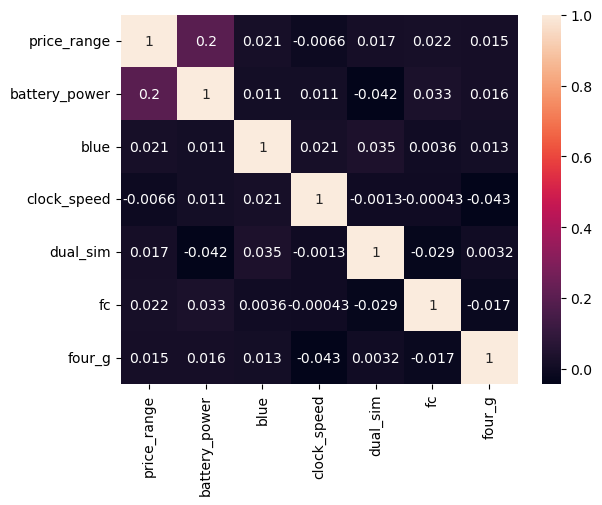

In [12]:
corr_1 = train_df[['price_range','battery_power','blue','clock_speed','dual_sim','fc','four_g']]
corr_1 = corr_1.corr()
sns.heatmap(corr_1 ,annot= True)

#### battery power only has a linear relation with mobile price

<Axes: >

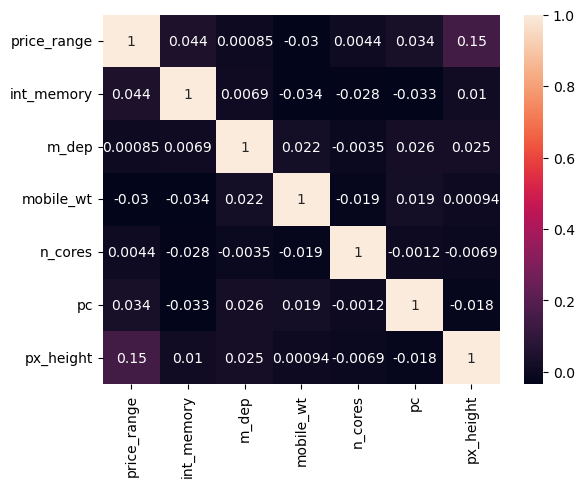

In [13]:
corr_2 = train_df[['price_range','int_memory','m_dep','mobile_wt','n_cores','pc','px_height']]
corr_2 = corr_2.corr()
sns.heatmap(corr_2 ,annot= True)

#### px_height has weak linear relation

<Axes: >

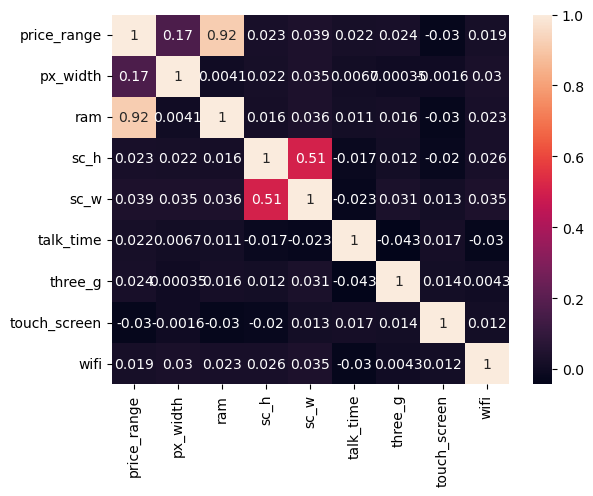

In [14]:
corr_3 = train_df[['price_range','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']]
corr_3 = corr_3.corr()
sns.heatmap(corr_3 ,annot= True)

#### ram has the greatest correlation coefficient and after it is px_width

### **Correlation in non-linear**

<Axes: >

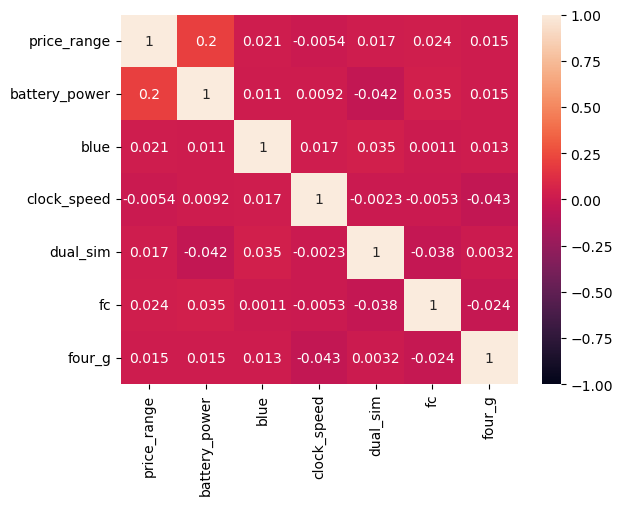

In [15]:
corr_1 = train_df[['price_range','battery_power','blue','clock_speed','dual_sim','fc','four_g']]
corr_1 = corr_1.corr(method='spearman')
sns.heatmap(corr_1 ,vmin=-1, vmax=1,annot= True)

<Axes: >

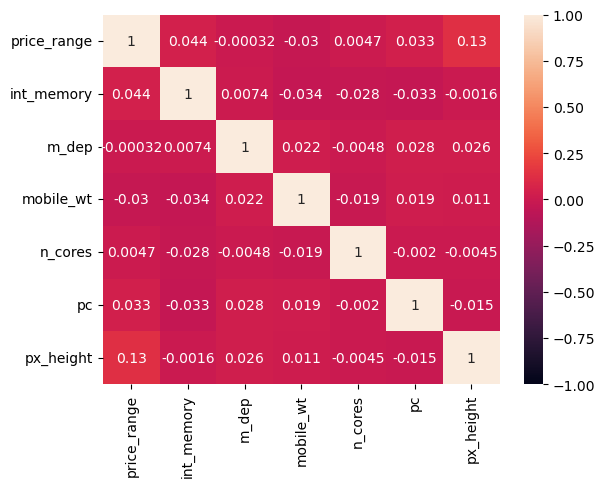

In [16]:
corr_2 = train_df[['price_range','int_memory','m_dep','mobile_wt','n_cores','pc','px_height']]
corr_2 = corr_2.corr(method='spearman')
sns.heatmap(corr_2 ,vmin=-1,vmax=1,annot= True)

<Axes: >

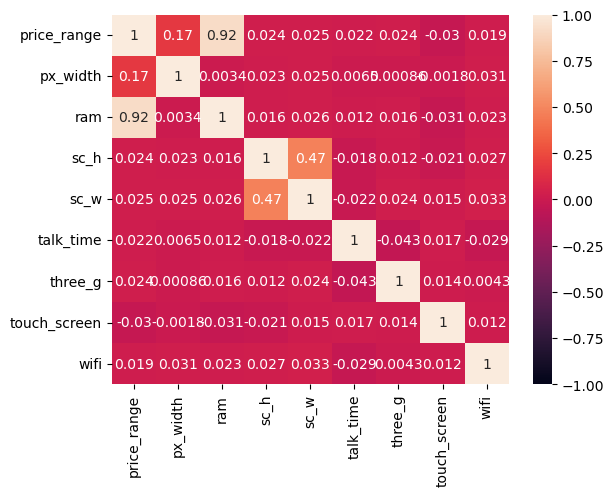

In [17]:
corr_3 = train_df[['price_range','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']]
corr_3 = corr_3.corr(method='spearman')
sns.heatmap(corr_3 ,vmin=-1, vmax=1, annot= True)

### We can drop clock speed and m_dep as they has very very low correlation with the price range

## **Drop Unneeded columns**

In [18]:
# As id doesn't indicate anything
test_df.drop(columns= ['id','m_dep','clock_speed'], inplace=True)
test_df.head()

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1,14,0,5,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,1,4,1,61,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,0,1,0,27,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,1,18,1,25,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,0,11,1,49,108,6,18,749,810,1773,15,8,7,1,0,1


In [19]:
train_df.drop(columns=['m_dep','clock_speed'], inplace=True)
train_df.head()

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,0,1,0,7,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,1,0,1,53,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,1,2,1,41,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,0,0,0,10,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,0,13,1,44,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## **Dealing with outliers**

In [20]:
fig = px.box(train_df['battery_power'],
             title='quartiles of the battery_power column',
             template='plotly_dark'
            )
fig.show()

In [21]:
fig = px.box(train_df['px_height'],
             title='quartiles of the px_height column',
             template='plotly_dark'
            )
fig.show()

In [22]:
fig = px.box(train_df['ram'],
             title='quartiles of the ram column',
             template='plotly_dark'
            )
fig.show()

In [23]:
fig = px.box(train_df['px_width'],
             title='quartiles of the px_width column',
             template='plotly_dark'
            )
fig.show()

### No outliers in the most effective columns on the data

In [24]:
X = train_df.drop('price_range' , axis= 'columns')
y = train_df['price_range']

### **Data Scaling**

In [25]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### **Data Splitting**

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , shuffle=True , random_state=42)

# **Machine Learning Models**

### **Logistic Regression**

In [27]:
lr_model = make_pipeline(SimpleImputer(strategy='mean') , MinMaxScaler() , LogisticRegression(penalty='l2' , C= 12 ,max_iter=1500))
lr_model.fit(X_train , y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(C=12, max_iter=1500))])

In [28]:
lr_model.score(X_train , y_train)

0.9775

In [29]:
lr_pred = lr_model.predict(X_test)

In [30]:
lr_acc_score = accuracy_score(y_test , lr_pred)
lr_acc_score

0.98

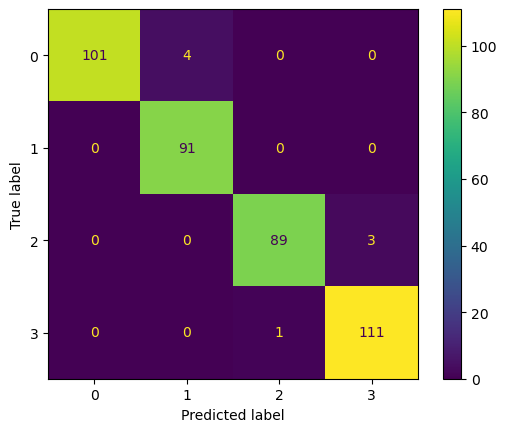

In [31]:
ConfusionMatrixDisplay.from_estimator(lr_model , X_test , y_test);

In [32]:
print(classification_report(y_test , lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.96      1.00      0.98        91
           2       0.99      0.97      0.98        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [33]:
x_test = test_df
x_test= scaler.fit_transform(x_test)

In [34]:
model_predict = lr_model.predict(x_test)
model_predict

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 0, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

### **Decision Tree**

In [35]:
dt_model = make_pipeline(SimpleImputer(strategy='mean') , MinMaxScaler() , DecisionTreeClassifier())
dt_model.fit(X_train , y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [36]:
dt_model.score(X_train , y_train)

1.0

In [37]:
dt_pred = dt_model.predict(X_test)

In [38]:
dt_acc_score = accuracy_score(y_test , dt_pred)
dt_acc_score

0.85

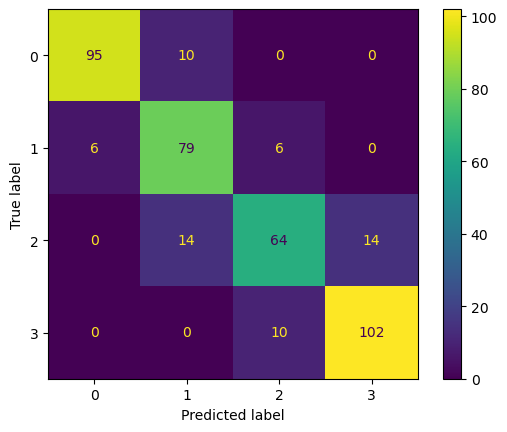

In [39]:
ConfusionMatrixDisplay.from_estimator(dt_model , X_test , y_test);

In [40]:
print(classification_report(y_test , dt_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       105
           1       0.77      0.87      0.81        91
           2       0.80      0.70      0.74        92
           3       0.88      0.91      0.89       112

    accuracy                           0.85       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.85      0.85       400



### Overfitting occurs

### **Random Forest**

In [41]:
rf_model = make_pipeline(SimpleImputer(strategy='mean') , MinMaxScaler() , RandomForestClassifier(n_estimators=500))
rf_model.fit(X_train , y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=500))])

In [42]:
rf_model.score(X_train , y_train)

1.0

In [43]:
rf_pred = rf_model.predict(X_test)

In [44]:
rf_acc_score = accuracy_score(y_test , rf_pred)
rf_acc_score

0.895

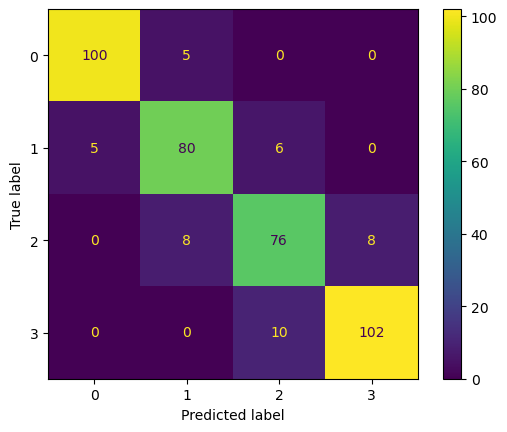

In [45]:
ConfusionMatrixDisplay.from_estimator(rf_model , X_test , y_test);

In [46]:
print(classification_report(y_test , rf_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       105
           1       0.86      0.88      0.87        91
           2       0.83      0.83      0.83        92
           3       0.93      0.91      0.92       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



### Overfitting also happened in this model

### **Support Vector Machine**

In [47]:
svc = make_pipeline(SimpleImputer(strategy='mean') , MinMaxScaler() , SVC())
svc.fit(X_train , y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

In [48]:
svc.score(X_train , y_train)

0.965625

In [49]:
svc_pred = svc.predict(X_test)

In [50]:
svc_acc_score = accuracy_score(y_test , svc_pred)
svc_acc_score

0.89

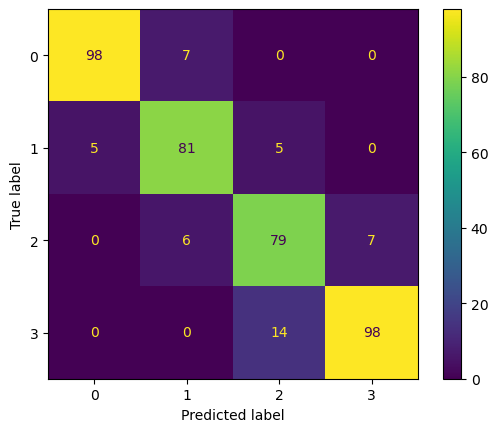

In [51]:
ConfusionMatrixDisplay.from_estimator(svc , X_test , y_test);

In [52]:
print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.86      0.89      0.88        91
           2       0.81      0.86      0.83        92
           3       0.93      0.88      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



# **Models Evaluation**

In [53]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    dt_acc_score*100,rf_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,98.0
1,Decision Tree,85.0
2,Random Forest,89.5
3,Support Vector Machine,89.0


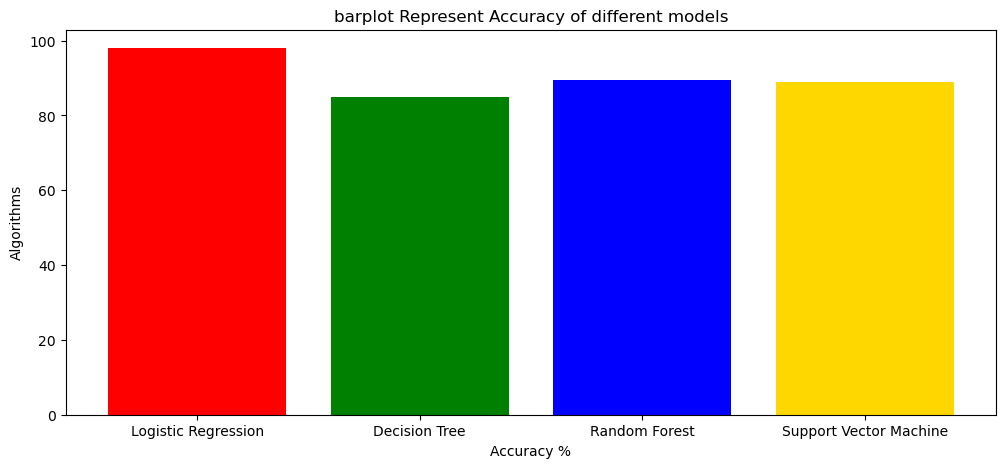

In [54]:
colors = ['red','green','blue','gold']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# **Conclusion**

The logistic regression performance is very powerful with this data